<a href="https://colab.research.google.com/github/dishaiitjmu/Marketing-Campaign-Analysis/blob/main/marketing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
df = pd.read_csv("marketing_campaign.csv", sep=';')

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check the first few rows
print(df.head())
print(df.columns.tolist())


     id  year_birth   education marital_status   income  kidhome  teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  dt_customer  recency  mntwines  ...  numwebvisitsmonth  acceptedcmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   acceptedcmp4  acceptedcmp5  acceptedcmp1  acceptedcmp2  complain  \
0             0

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['axes.grid'] = True

# Paths
DATA_PATH = "marketing_campaign.csv"  # dataset is in same folder
OUTPUT_DIR = "."                      # outputs saved in current folder
FIG_DIR = os.path.join(OUTPUT_DIR, "figures")
os.makedirs(FIG_DIR, exist_ok=True)

print("Setup complete! Ready to load data.")


Setup complete! Ready to load data.


In [6]:
# Load dataset
df = pd.read_csv(DATA_PATH, sep=';')

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert date column
df['dt_customer'] = pd.to_datetime(df['dt_customer'], errors='coerce')

# Fill missing income with median
df['income'] = df['income'].fillna(df['income'].median())

# Create total spend column
spend_cols = ['mntwines', 'mntfruits', 'mntmeatproducts',
              'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']
df['total_spend'] = df[spend_cols].sum(axis=1)

# Create frequency column
purchase_cols = ['numdealspurchases', 'numwebpurchases',
                 'numcatalogpurchases', 'numstorepurchases']
df['frequency'] = df[purchase_cols].sum(axis=1)

# Create total campaigns accepted column
campaign_cols = ['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3',
                 'acceptedcmp4', 'acceptedcmp5']
df['total_campaigns_accepted'] = df[campaign_cols].sum(axis=1)

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        2240 non-null   int64         
 1   year_birth                2240 non-null   int64         
 2   education                 2240 non-null   object        
 3   marital_status            2240 non-null   object        
 4   income                    2240 non-null   float64       
 5   kidhome                   2240 non-null   int64         
 6   teenhome                  2240 non-null   int64         
 7   dt_customer               2240 non-null   datetime64[ns]
 8   recency                   2240 non-null   int64         
 9   mntwines                  2240 non-null   int64         
 10  mntfruits                 2240 non-null   int64         
 11  mntmeatproducts           2240 non-null   int64         
 12  mntfishproducts     

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,total_spend,frequency,total_campaigns_accepted
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,1617,25,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,27,6,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,776,21,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,53,8,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,422,19,0


In [7]:
# Basic KPIs
kpis = {
    'total_customers': len(df),
    'avg_income': float(df['income'].mean()),
    'median_income': float(df['income'].median()),
    'avg_total_spend': float(df['total_spend'].mean()),
    'median_total_spend': float(df['total_spend'].median()),
    'overall_campaign_response_rate': float(df['response'].mean()),
    'overall_cmp_accepts_rate': float((df['total_campaigns_accepted'] > 0).mean())
}

print("KPI Snapshot:")
for k, v in kpis.items():
    print(f"{k}: {v}")


KPI Snapshot:
total_customers: 2240
avg_income: 52237.97544642857
median_income: 51381.5
avg_total_spend: 605.7982142857143
median_total_spend: 396.0
overall_campaign_response_rate: 0.14910714285714285
overall_cmp_accepts_rate: 0.20669642857142856


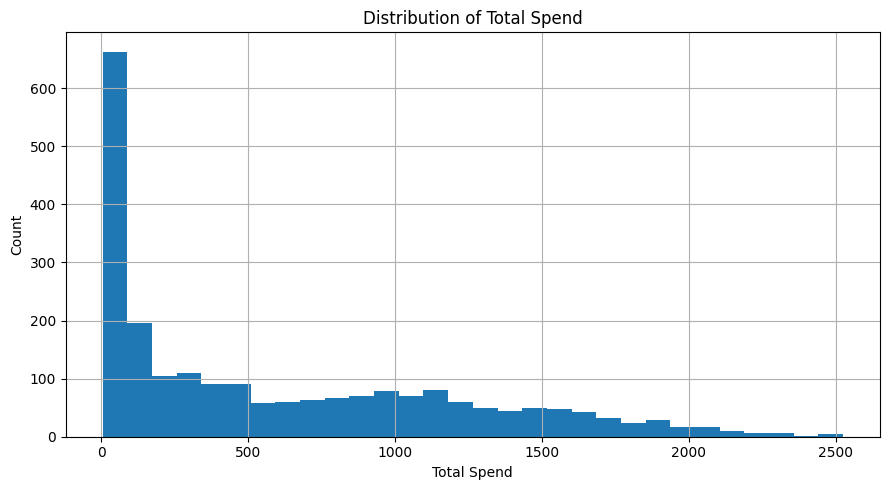

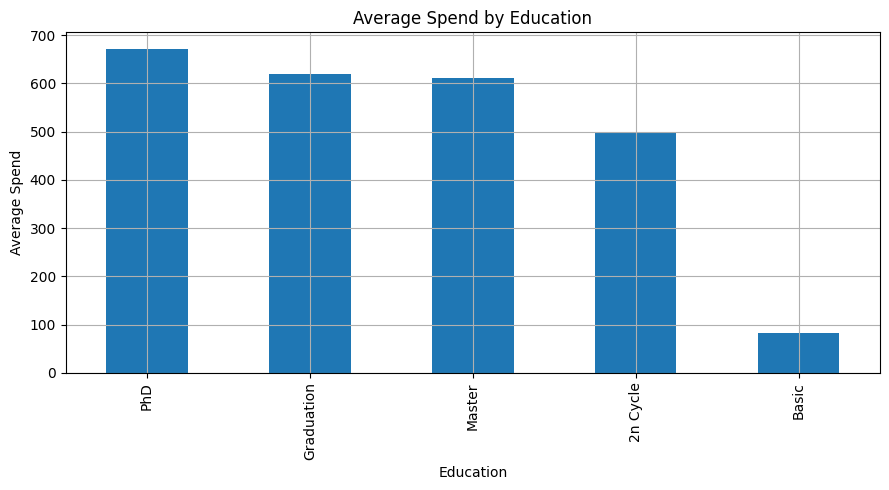

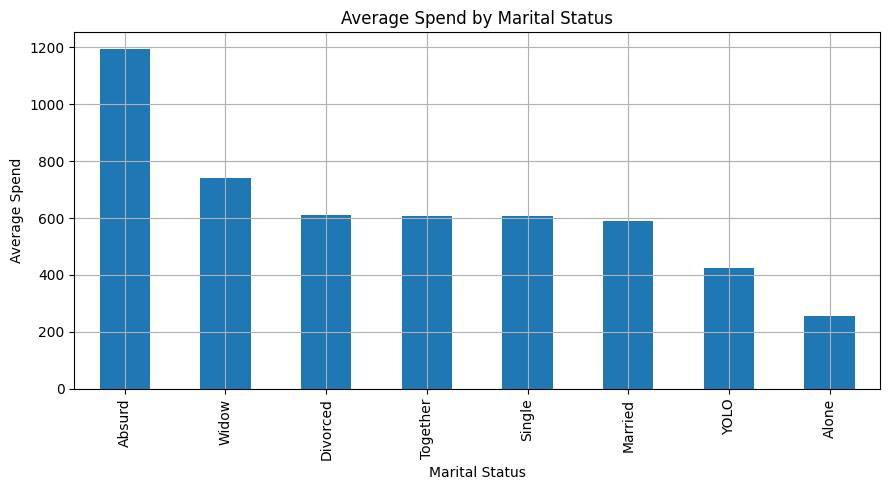

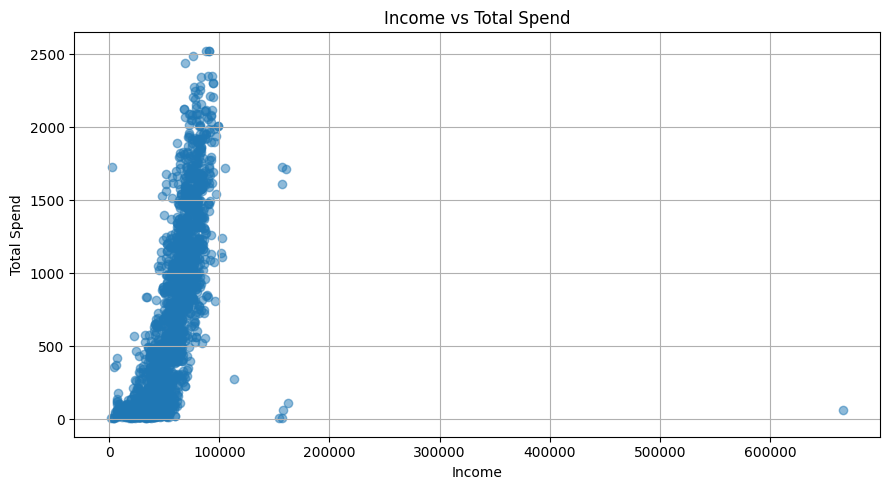

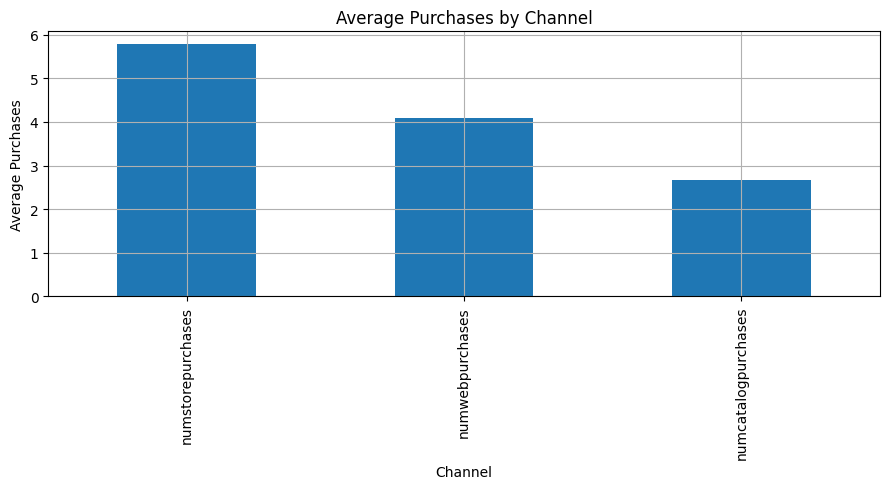

In [8]:
# 4.1 Distribution of Total Spend
plt.figure()
plt.hist(df['total_spend'], bins=30)
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, 'dist_total_spend.png'))
plt.show()

# 4.2 Average Spend by Education
if 'education' in df.columns:
    spend_by_edu = df.groupby('education')['total_spend'].mean().sort_values(ascending=False)
    plt.figure()
    spend_by_edu.plot(kind='bar')
    plt.title('Average Spend by Education')
    plt.xlabel('Education')
    plt.ylabel('Average Spend')
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, 'avg_spend_by_education.png'))
    plt.show()

# 4.3 Average Spend by Marital Status
if 'marital_status' in df.columns:
    spend_by_ms = df.groupby('marital_status')['total_spend'].mean().sort_values(ascending=False)
    plt.figure()
    spend_by_ms.plot(kind='bar')
    plt.title('Average Spend by Marital Status')
    plt.xlabel('Marital Status')
    plt.ylabel('Average Spend')
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, 'avg_spend_by_marital_status.png'))
    plt.show()

# 4.4 Income vs Total Spend
if 'income' in df.columns:
    plt.figure()
    plt.scatter(df['income'], df['total_spend'], alpha=0.5)
    plt.title('Income vs Total Spend')
    plt.xlabel('Income')
    plt.ylabel('Total Spend')
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, 'income_vs_total_spend.png'))
    plt.show()

# 4.5 Average Purchases by Channel
channel_cols = ['numwebpurchases', 'numcatalogpurchases', 'numstorepurchases']
present_channels = [c for c in channel_cols if c in df.columns]
if present_channels:
    avg_by_channel = df[present_channels].mean().sort_values(ascending=False)
    plt.figure()
    avg_by_channel.plot(kind='bar')
    plt.title('Average Purchases by Channel')
    plt.xlabel('Channel')
    plt.ylabel('Average Purchases')
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, 'avg_purchases_by_channel.png'))
    plt.show()


Top RFM segments by count:
rfm_segment
Recent-Low-Low                  137
Very Recent-Low-Low             129
Inactive-Low-Low                129
Moderate-Low-Low                103
Very Recent-Medium-Medium        95
Inactive-Medium-Medium           89
Recent-Medium-Medium             85
Moderate-High-High               79
Inactive-Very High-Very High     79
Moderate-High-Very High          75
Name: count, dtype: int64


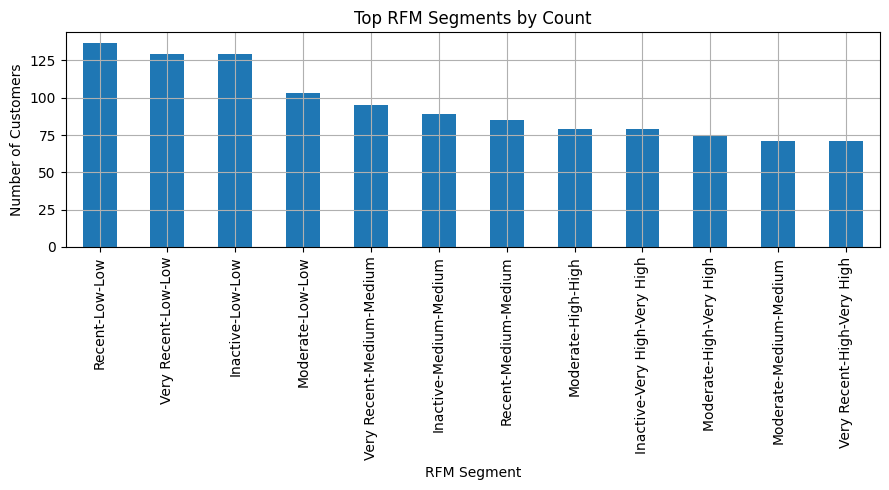

In [9]:
# Fill missing values for safety
df['recency'] = df['recency'].fillna(df['recency'].median())
df['frequency'] = df['frequency'].fillna(0)
df['total_spend'] = df['total_spend'].fillna(0)

# Define labels
recency_labels = ['Very Recent', 'Recent', 'Moderate', 'Inactive']
frequency_labels = ['Low', 'Medium', 'High', 'Very High']
monetary_labels = ['Low', 'Medium', 'High', 'Very High']

# Recency quartiles
try:
    df['recency_segment'] = pd.qcut(df['recency'], 4, labels=recency_labels, duplicates='drop')
except:
    df['recency_segment'] = pd.qcut(df['recency'].rank(method='first'), 4, labels=recency_labels)

# Frequency quartiles
try:
    df['frequency_segment'] = pd.qcut(df['frequency'], 4, labels=frequency_labels, duplicates='drop')
except:
    df['frequency_segment'] = pd.qcut(df['frequency'].rank(method='first'), 4, labels=frequency_labels)

# Monetary quartiles
try:
    df['monetary_segment'] = pd.qcut(df['total_spend'], 4, labels=monetary_labels, duplicates='drop')
except:
    df['monetary_segment'] = pd.qcut(df['total_spend'].rank(method='first'), 4, labels=monetary_labels)

# Combine into one RFM segment
df['rfm_segment'] = (
    df['recency_segment'].astype(str) + '-' +
    df['frequency_segment'].astype(str) + '-' +
    df['monetary_segment'].astype(str)
)

# Segment counts
seg_counts = df['rfm_segment'].value_counts().sort_values(ascending=False)

print("Top RFM segments by count:")
print(seg_counts.head(10))

# Plot top 12 segments
plt.figure()
seg_counts.head(12).plot(kind='bar')
plt.title('Top RFM Segments by Count')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, 'rfm_segment_counts.png'))
plt.show()


Last campaign response rate by RFM segment (Top 10):
rfm_segment
Very Recent-Medium-Very High       60.00
Very Recent-High-Medium            55.56
Very Recent-High-Very High         47.89
Very Recent-Very High-Very High    43.14
Inactive-Medium-Very High          40.00
Moderate-Medium-Very High          37.50
Recent-Medium-Very High            37.50
Recent-High-Very High              33.33
Very Recent-High-High              28.57
Recent-Very High-Very High         28.17
Name: response, dtype: float64


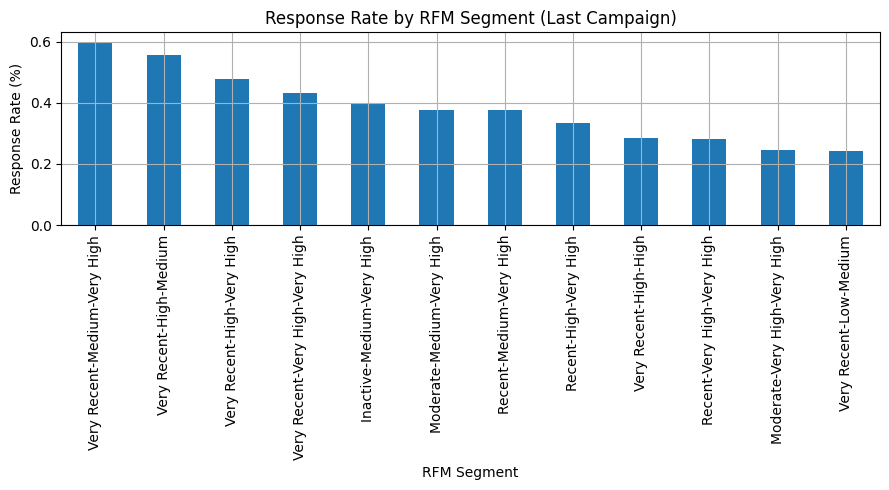

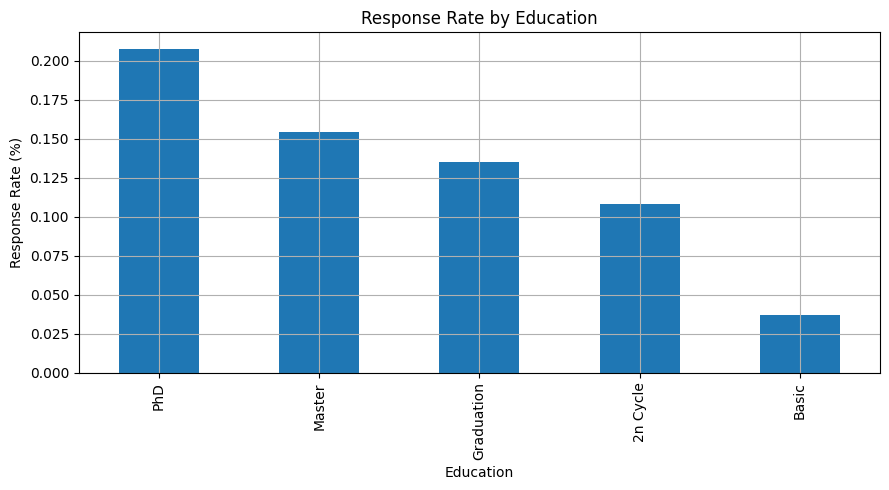

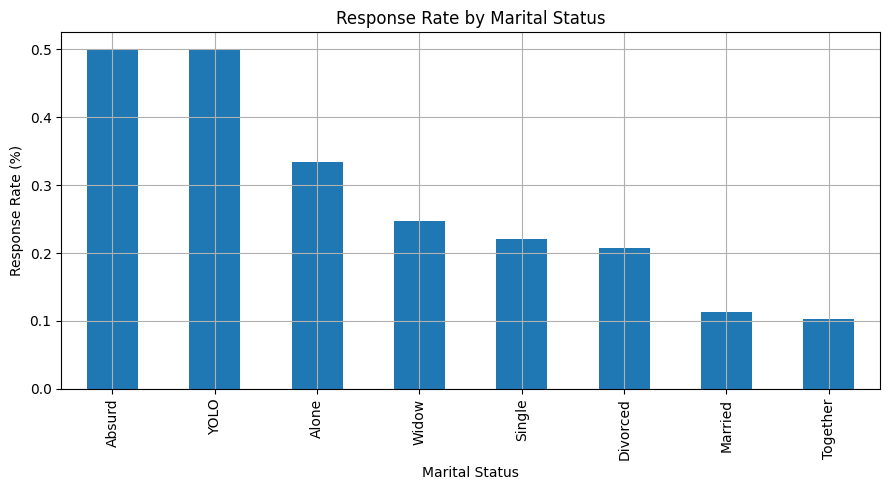

In [10]:
# Response rate by RFM segment (last campaign)
if 'response' in df.columns:
    acc_by_rfm = df.groupby('rfm_segment')['response'].mean().sort_values(ascending=False)
    print("Last campaign response rate by RFM segment (Top 10):")
    print((acc_by_rfm * 100).round(2).head(10))

    plt.figure()
    acc_by_rfm.head(12).plot(kind='bar')
    plt.title('Response Rate by RFM Segment (Last Campaign)')
    plt.xlabel('RFM Segment')
    plt.ylabel('Response Rate (%)')
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, 'response_rate_by_rfm.png'))
    plt.show()

# Response rate by Education
if 'education' in df.columns and 'response' in df.columns:
    acc_by_edu = df.groupby('education')['response'].mean().sort_values(ascending=False)
    plt.figure()
    acc_by_edu.plot(kind='bar')
    plt.title('Response Rate by Education')
    plt.xlabel('Education')
    plt.ylabel('Response Rate (%)')
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, 'response_rate_by_education.png'))
    plt.show()

# Response rate by Marital Status
if 'marital_status' in df.columns and 'response' in df.columns:
    acc_by_ms = df.groupby('marital_status')['response'].mean().sort_values(ascending=False)
    plt.figure()
    acc_by_ms.plot(kind='bar')
    plt.title('Response Rate by Marital Status')
    plt.xlabel('Marital Status')
    plt.ylabel('Response Rate (%)')
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, 'response_rate_by_marital_status.png'))
    plt.show()


Cluster profile (means):
         recency  frequency  total_spend
cluster                                 
0          49.07      22.16      1201.74
1          23.77       9.42       164.12
2          75.67       9.74       184.52


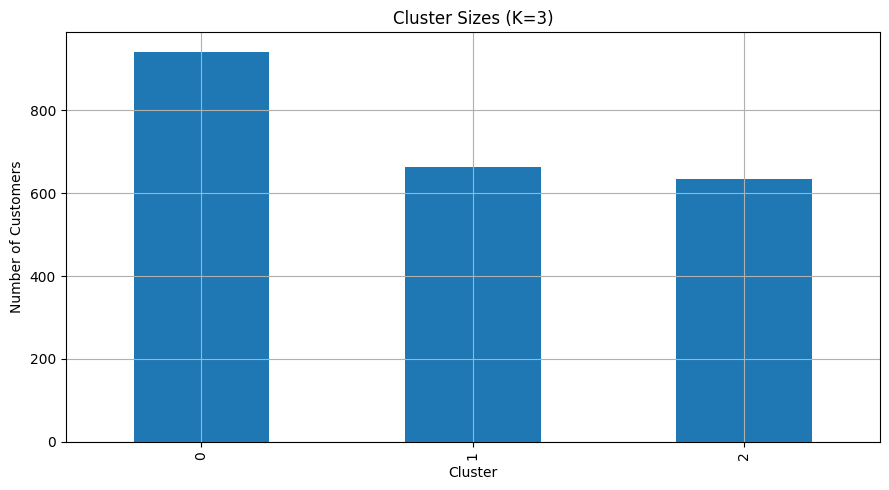

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select RFM features
X = df[['recency', 'frequency', 'total_spend']].copy()

# Handle missing values
X = X.fillna(0)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans (3 clusters for simplicity)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Cluster profile
cluster_profile = df.groupby('cluster')[['recency', 'frequency', 'total_spend']].mean().round(2)
print("Cluster profile (means):")
print(cluster_profile)

# Plot cluster sizes
cluster_counts = df['cluster'].value_counts().sort_index()
plt.figure()
cluster_counts.plot(kind='bar')
plt.title('Cluster Sizes (K=3)')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, 'cluster_sizes.png'))
plt.show()


In [12]:
insights = []

# High-value customers (top 20% spenders)
hi_spend_thresh = df['total_spend'].quantile(0.8)
hi_val_share = (df['total_spend'] >= hi_spend_thresh).mean()
insights.append(f"Top 20% customers account for ~{hi_val_share*100:.1f}% of the base. Focus retention campaigns here.")

# Best responding RFM segment
if 'response' in df.columns and 'rfm_segment' in df.columns:
    resp_by_seg = df.groupby('rfm_segment')['response'].mean().sort_values(ascending=False)
    if len(resp_by_seg) > 0:
        top_seg, top_rate = resp_by_seg.index[0], resp_by_seg.iloc[0]*100
        insights.append(f"Highest response segment: **{top_seg}** (~{top_rate:.1f}% response rate).")

# Best education group for campaigns
if 'education' in df.columns and 'response' in df.columns:
    best_edu = df.groupby('education')['response'].mean().sort_values(ascending=False).index[0]
    insights.append(f"Highest campaign response by education group: **{best_edu}**.")

# Best marital status group for campaigns
if 'marital_status' in df.columns and 'response' in df.columns:
    best_ms = df.groupby('marital_status')['response'].mean().sort_values(ascending=False).index[0]
    insights.append(f"Highest campaign response by marital status: **{best_ms}**.")

# Print all insights
print("🔍 Auto-Generated Insights:")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")


🔍 Auto-Generated Insights:
1. Top 20% customers account for ~20.0% of the base. Focus retention campaigns here.
2. Highest response segment: **Very Recent-Medium-Very High** (~60.0% response rate).
3. Highest campaign response by education group: **PhD**.
4. Highest campaign response by marital status: **Absurd**.


In [13]:
# Save cleaned dataset
clean_path = "clean_marketing_campaign.csv"
df.to_csv(clean_path, index=False)

print(f"✅ Cleaned dataset saved as: {clean_path}")
print(f"✅ All figures saved in: {FIG_DIR}")


✅ Cleaned dataset saved as: clean_marketing_campaign.csv
✅ All figures saved in: ./figures


In [14]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
!mkdir -p /content/drive/MyDrive/marketing-campaign-analysis


In [16]:
df.to_csv('/content/drive/MyDrive/marketing-campaign-analysis/clean_marketing_campaign.csv', index=False)
